In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.style.use('ggplot')

from IPython.display import display
import ipywidgets as widgets
import pandas as pd

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


def SIR_Model(Beta,Gamma):
    
    # Total population, N.
    N = 10000
    # Initial number of infected and recovered individuals, I0 and R0.
    I0, Ri = 1, 0
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - Ri
    # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
    beta, gamma = Beta,Gamma#0.4, 1./10 
    # A grid of time points (in days)
    t = np.linspace(0, 160, 160)
    
    # Initial conditions vector
    y0 = S0, I0, Ri
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    
    R0=round(beta/gamma,2)
    print('Beta: {}, Gamma: {} - R0 Value: {}'.format(Beta,Gamma,R0))
    
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
    return None


Beta=widgets.FloatSlider(
    value=0.4,
    min=0,
    max=2,
    description='Beta:',
    step=0.2,
    disabled=False
)
Gamma=widgets.FloatSlider(
    value=0.1,
    min=0.01,
    max=2,
    description='Gamma:',
    step=0.1,
    disabled=False
)

Beta: 0.4, Gamma: 0.1 - R0 Value: 4.0


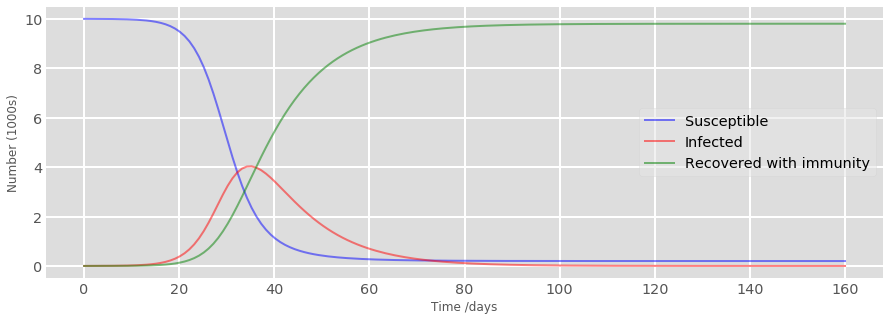

In [2]:
widgets.interactive(SIR_Model,
                 Beta=Beta,
                 Gamma=Gamma)